In [41]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [60]:
relationship_df= pd.read_csv('country_relationship_2.csv' , index_col=0)

In [64]:
relationship_df.head()

,source,target,value
0,France,Italy,10
1,Germany,Italy,31
2,Bulgaria,Germany,11
3,Austria,Germany,11
4,Germany,Spain,1


In [68]:
# Create a network object from the df

G = nx.from_pandas_edgelist (relationship_df,
                             source = 'source',
                             target = 'target',
                             edge_attr = 'value',
                             create_using = nx.Graph())

In [45]:
#create static network graph with networkz

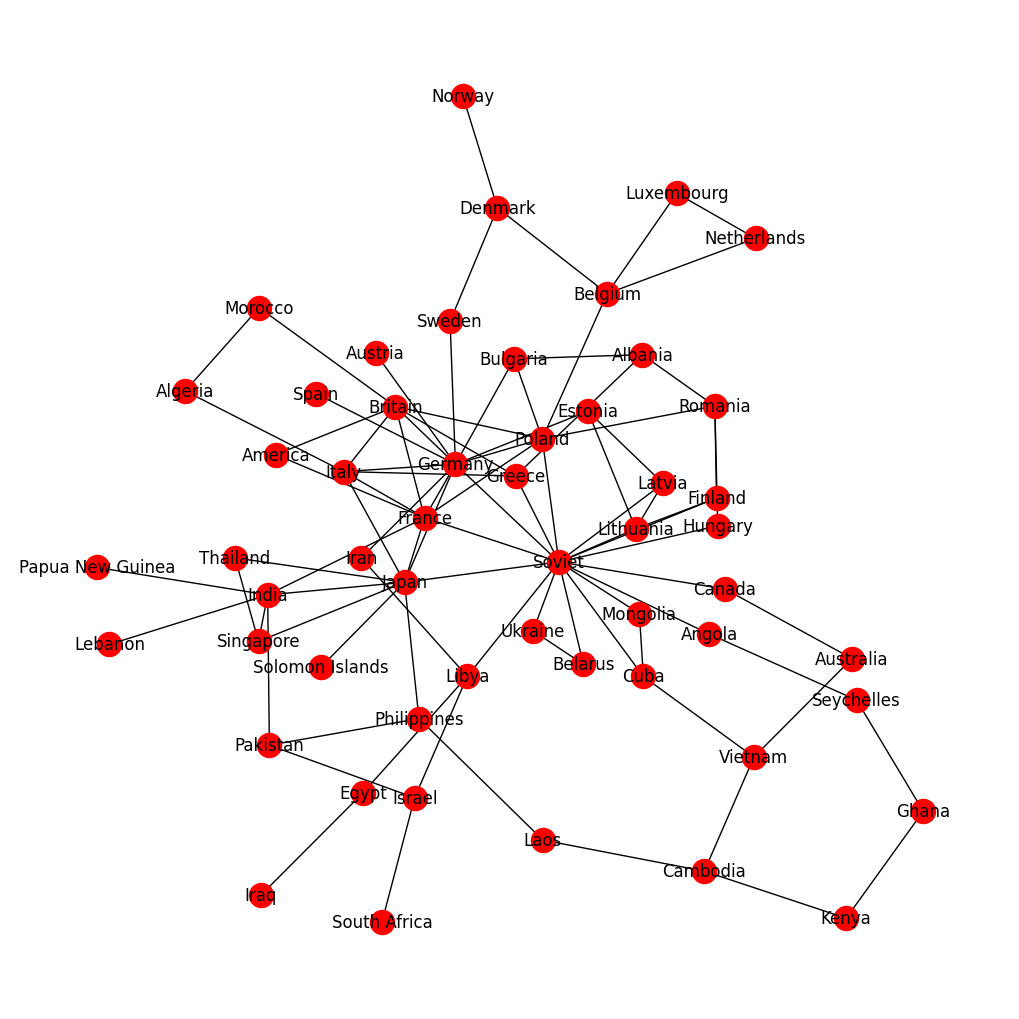

In [70]:
h = plt.figure (figsize=(10,10))
pos = nx.kamada_kawai_layout (G)
nx.draw (G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

In [74]:
#Switch to pyvis, build an interactive network graph
# save as html

In [82]:
#definte net object
net = Network()
net = Network(notebook=True, width='900px', height = '800px', bgcolor = '#222222', 
              font_color='white')

#definte nodes from G object
node_degree = dict(G.degree)

#Setting up node size attributes
nx.set_node_attributes (G,node_degree, 'size')
net.from_nx(G)
net.show_buttons (filter_ = True )
net.repulsion ()
net.show('20thcentury.html')

20thcentury.html


In [85]:
# Apply Leiden algorithm to detect any communities within the countries.

In [105]:
from cdlib import algorithms

In [110]:
coms = algorithms.leiden(G)

In [112]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [114]:
new_com = coms.to_node_community_map()

In [116]:
new_com

defaultdict(list,
            {'France': [0],
             'Italy': [0],
             'Germany': [0],
             'Bulgaria': [0],
             'Austria': [0],
             'Spain': [0],
             'Britain': [0],
             'Poland': [0],
             'Greece': [0],
             'Albania': [0],
             'Morocco': [0],
             'Algeria': [0],
             'America': [0],
             'Estonia': [1],
             'Latvia': [1],
             'Lithuania': [1],
             'Soviet': [1],
             'Finland': [1],
             'Ukraine': [1],
             'Belarus': [1],
             'Romania': [1],
             'Hungary': [1],
             'Mongolia': [1],
             'Cuba': [1],
             'Japan': [2],
             'Thailand': [2],
             'Singapore': [2],
             'Philippines': [2],
             'Solomon Islands': [2],
             'India': [2],
             'Pakistan': [2],
             'Papua New Guinea': [2],
             'Lebanon': [2],
            

In [118]:
# Put the output from new_com into a dictionary

dict_com= {k:v[0] for k,v in new_com.items()}

In [120]:
dict_com

{'France': 0,
 'Italy': 0,
 'Germany': 0,
 'Bulgaria': 0,
 'Austria': 0,
 'Spain': 0,
 'Britain': 0,
 'Poland': 0,
 'Greece': 0,
 'Albania': 0,
 'Morocco': 0,
 'Algeria': 0,
 'America': 0,
 'Estonia': 1,
 'Latvia': 1,
 'Lithuania': 1,
 'Soviet': 1,
 'Finland': 1,
 'Ukraine': 1,
 'Belarus': 1,
 'Romania': 1,
 'Hungary': 1,
 'Mongolia': 1,
 'Cuba': 1,
 'Japan': 2,
 'Thailand': 2,
 'Singapore': 2,
 'Philippines': 2,
 'Solomon Islands': 2,
 'India': 2,
 'Pakistan': 2,
 'Papua New Guinea': 2,
 'Lebanon': 2,
 'Laos': 3,
 'Cambodia': 3,
 'Kenya': 3,
 'Ghana': 3,
 'Seychelles': 3,
 'Angola': 3,
 'Canada': 3,
 'Australia': 3,
 'Vietnam': 3,
 'Libya': 4,
 'Egypt': 4,
 'Iraq': 4,
 'Israel': 4,
 'South Africa': 4,
 'Iran': 4,
 'Belgium': 5,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5}

In [126]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes (G, dict_com, 'group')
com_net = Network (notebook = True, width ='1300px', height = '700px', 
                   bgcolor = '#222222', font_color = 'white')
com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()
com_net.show('20thcentury_leiden.html')

20thcentury_leiden.html


#### Many of the red connections used to be part of the USSR, or had close relations to the USSR. Therefore, this makes sense. 
#### In the yellow section, Japan was involved in aggressions with many of these countries, therefore this makes sense as well. 
#### Germany, Italy, Japan, and Britain, France, Poland, USSR, America were all heavily involved in ww2, therefore, the blue connections between these countries makes sense. 


In [133]:
# Calculate and visualize the degree, closeness, and betweenness centrality measures

In [135]:
# degree centrality

degree_dict = nx.degree_centrality (G)
degree_dict

{'France': 0.1509433962264151,
 'Italy': 0.11320754716981132,
 'Germany': 0.22641509433962265,
 'Bulgaria': 0.05660377358490566,
 'Austria': 0.018867924528301886,
 'Spain': 0.018867924528301886,
 'Britain': 0.1320754716981132,
 'Poland': 0.1320754716981132,
 'Estonia': 0.05660377358490566,
 'Latvia': 0.05660377358490566,
 'Lithuania': 0.07547169811320754,
 'Soviet': 0.3018867924528302,
 'Finland': 0.05660377358490566,
 'Belgium': 0.07547169811320754,
 'Netherlands': 0.03773584905660377,
 'Luxembourg': 0.03773584905660377,
 'Denmark': 0.05660377358490566,
 'Norway': 0.018867924528301886,
 'Sweden': 0.03773584905660377,
 'Greece': 0.07547169811320754,
 'Albania': 0.05660377358490566,
 'Ukraine': 0.03773584905660377,
 'Belarus': 0.03773584905660377,
 'Libya': 0.07547169811320754,
 'Egypt': 0.03773584905660377,
 'Iraq': 0.018867924528301886,
 'Japan': 0.16981132075471697,
 'Morocco': 0.03773584905660377,
 'Algeria': 0.03773584905660377,
 'America': 0.03773584905660377,
 'Thailand': 0.03773

In [139]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [141]:
degree_df.sort_values(by=['centrality'], ascending = False, inplace = True)

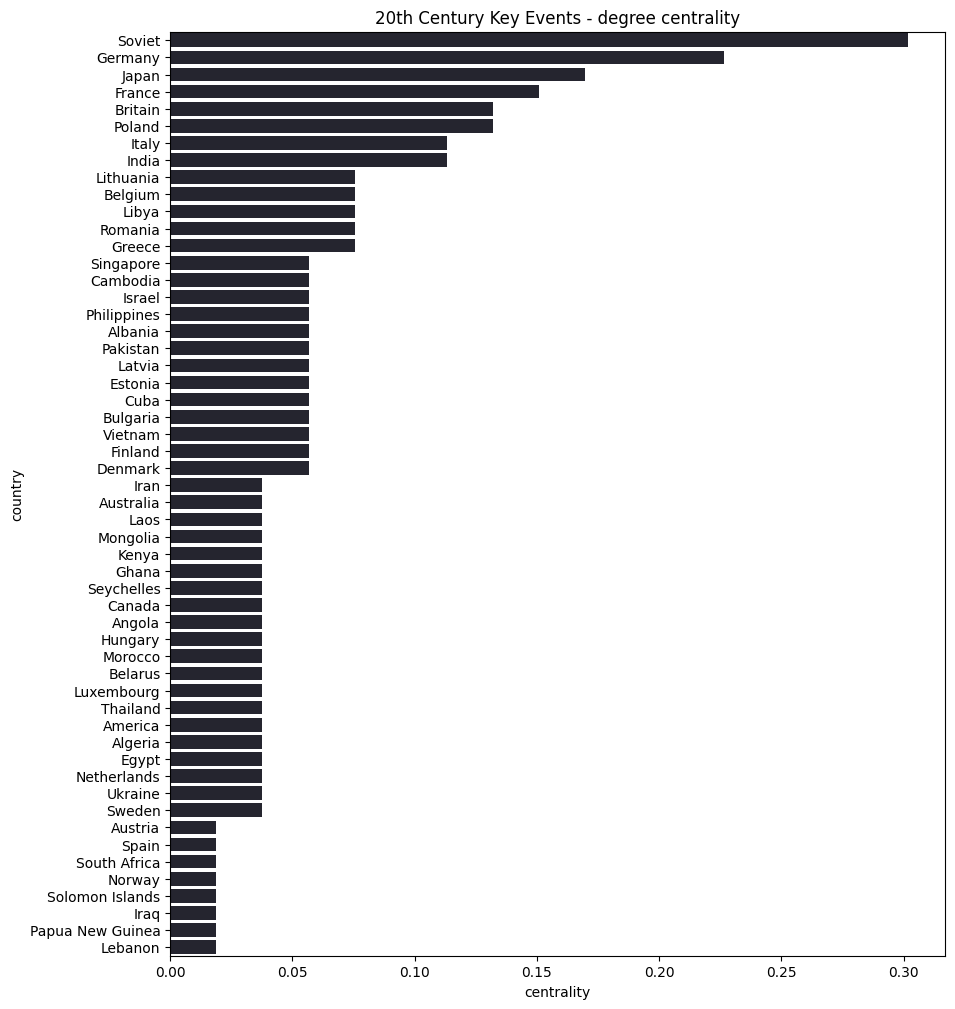

In [147]:
#plot degree centrality

plt.figure (figsize = (10,12))
with sns.dark_palette('xkcd:blue', 22):
    sns.barplot (x='centrality', y='country',
    saturation = 0.9, data = degree_df).set_title ('20th Century Key Events - degree centrality')

#### The more attached ties one node has, the more prominent its place in the network is. Therefore, the top 5 countries on the graph isn't surprising as they were heavily involved in ww1, world war two, as well as key events post world war 2. 

In [152]:
# closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df=pd.DataFrame(closeness_dict.items(), columns = ['country', 'centrality'])

In [154]:
closeness_df.sort_values(by = ['centrality'], ascending = False, inplace = True)

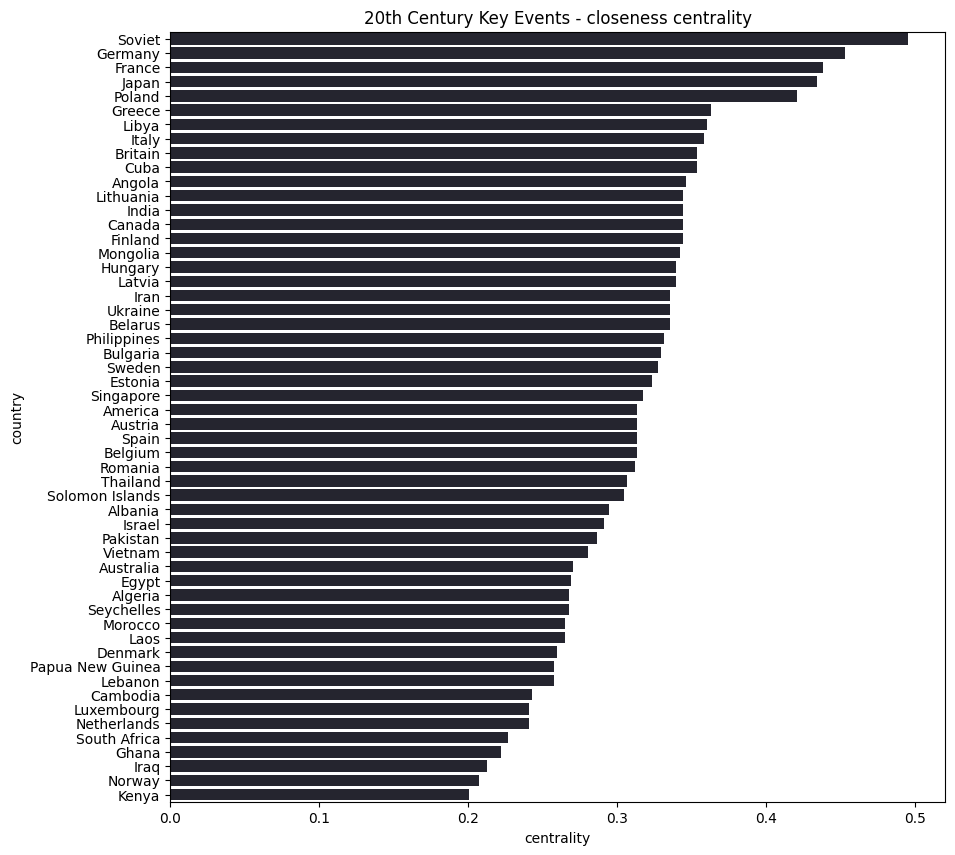

In [158]:
plt.figure (figsize = (10,10))
with sns.dark_palette('xkcd:blue', 22):
    sns.barplot (x='centrality', y='country',
                 saturation = 0.9, data = closeness_df).set_title('20th Century Key Events - closeness centrality')

In [178]:
# The assumption behind this measure is that the more central a node is, the closer it will be to all the other nodes. In graph theory, 
#closeness is used to find the central nodes that are more likely to control, gather, and spread information 
# most efficiently through their connections in the network. 

There is little change to the top countries, however, the values are significantly higher for this graph, showing the fact that many countries were connected to the top few countries throughout the key events of the 20th century.

In [161]:
#betweenness centrality

In [163]:
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df=pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [165]:
betweenness_df.sort_values(by=['centrality'], ascending = False, inplace=True)

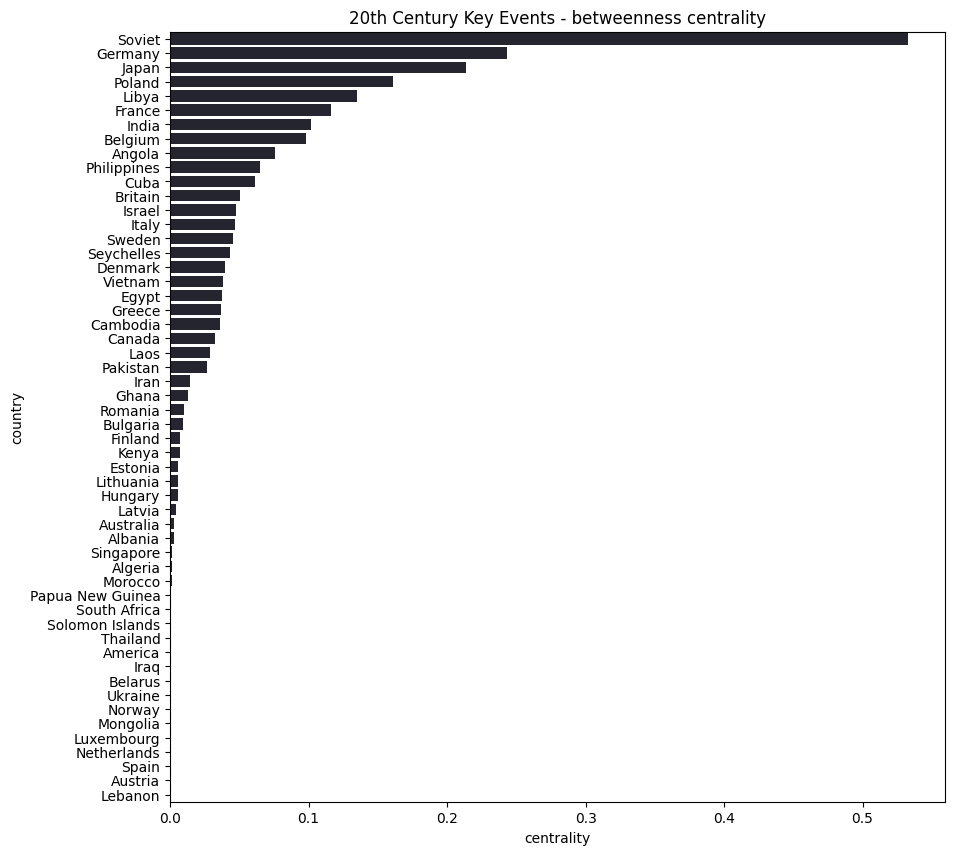

In [169]:
plt.figure (figsize=(10,10))
with sns.dark_palette('xkcd:blue', 22):
    sns.barplot(x='centrality',y='country',
    saturation = 0.9, data=betweenness_df).set_title('20th Century Key Events - betweenness centrality')

In [176]:
# betweenness centrality is a measure of control where the other nodes “depend” on the node that lies on the highest concentration of paths.

#### Once again, the top few countries remain the same, with USSR as the top spot given its early involvement in 20th century events, from pre war to post war. 

#### While America was heavily involved in the key events of the 20th century, they may lie lower on these graphs, especially when compared to USSR, as America only became more involved during ww2. This is much later compared to USSR's influence that spanned longer from the Russian revolution, to ww2, and post war events. 